#   EDA in Business Analytics
    27 February 2024

# Read and Load Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
sales = pd.read_csv('vgsales.csv')

In [3]:
sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Data Summary

In [4]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


# Data Cleaning

In [5]:
# Check for missing values
sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# Drop rows with missing values
sales.dropna(inplace=True)

In [7]:
# Display the shape of the DataFrame before removing outliers
print("Shape of DataFrame after removing outliers:", sales.shape)

Shape of DataFrame after removing outliers: (16291, 11)


In [8]:
# Define the function detect_outliers: z-score
def detect_outliers(df, col):
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers_indices = df[(z_scores > 3) | (z_scores < -3)].index
    return outliers_indices

In [9]:
# Detect outliers in the Global_Sales column
outliers_indices = detect_outliers(sales, 'Global_Sales')

In [10]:
# Remove outliers from the DataFrame
sales_no_outliers = sales.drop(outliers_indices)

In [11]:
# Display the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", sales_no_outliers.shape)

Shape of DataFrame after removing outliers: (16113, 11)


In [12]:
# Convert Year from float to DateTime format
sales['Year'] = pd.to_datetime(sales['Year'], format='%Y')

In [13]:
print(sales['Year'].info())

<class 'pandas.core.series.Series'>
Index: 16291 entries, 0 to 16597
Series name: Year
Non-Null Count  Dtype         
--------------  -----         
16291 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 770.6 KB
None


# Descriptive Analysis

In [14]:
# Calculate summary statistics
summary_stats = sales.describe()

In [15]:
# Print the summary statistics
print(summary_stats)

               Rank                           Year      NA_Sales  \
count  16291.000000                          16291  16291.000000   
mean    8290.190228  2006-05-29 00:06:32.462095744      0.265647   
min        1.000000            1980-01-01 00:00:00      0.000000   
25%     4132.500000            2003-01-01 00:00:00      0.000000   
50%     8292.000000            2007-01-01 00:00:00      0.080000   
75%    12439.500000            2010-01-01 00:00:00      0.240000   
max    16600.000000            2020-01-01 00:00:00     41.490000   
std     4792.654450                            NaN      0.822432   

           EU_Sales      JP_Sales   Other_Sales  Global_Sales  
count  16291.000000  16291.000000  16291.000000  16291.000000  
mean       0.147731      0.078833      0.048426      0.540910  
min        0.000000      0.000000      0.000000      0.010000  
25%        0.000000      0.000000      0.000000      0.060000  
50%        0.020000      0.000000      0.010000      0.170000  
75%

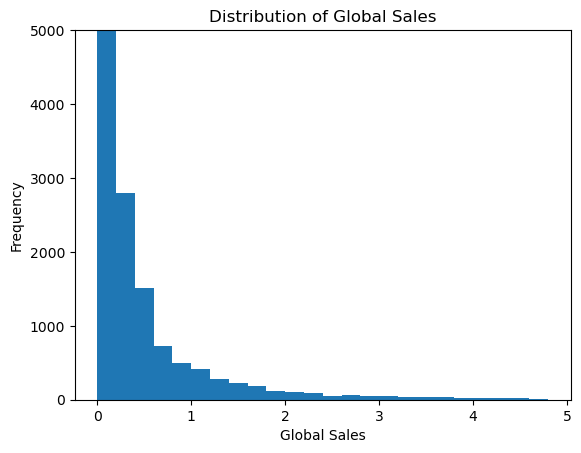

In [20]:
# Visualize Distribution of Global Sales
plt.hist(sales['Global_Sales'], bins=np.arange(0, 5, 0.2))
plt.ylim(0, 5000)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

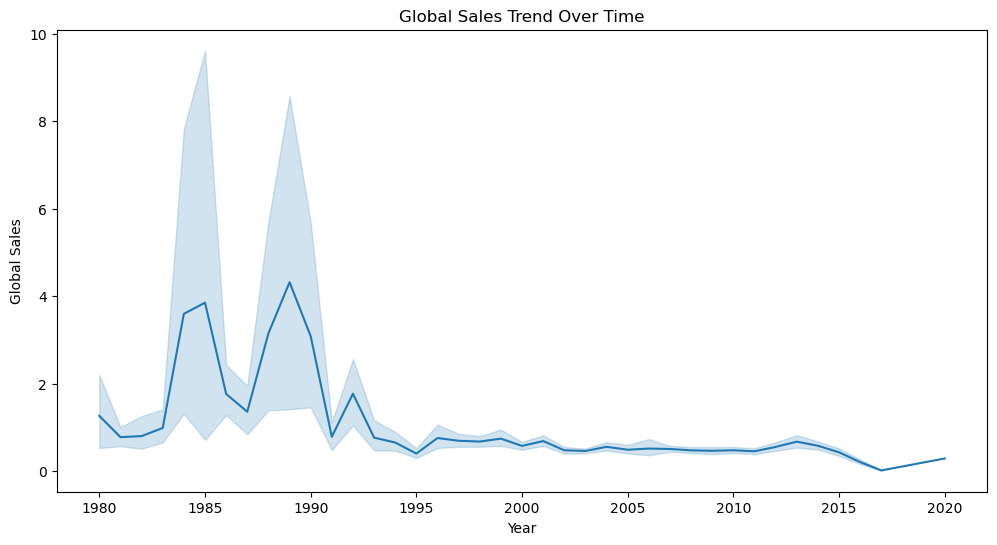

In [21]:
# Visualize trends over time (assuming 'Year' is the time dimension)
plt.figure(figsize=(12, 6))
sn.lineplot(x='Year', y='Global_Sales', data=sales)
plt.title('Global Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()

# Segmentation and Profiling

In [22]:
# Segmenting by Genre
genre_groups = sales.drop(columns=['Year']).groupby('Genre')
for genre, group_sales in genre_groups:
    print(f"Genre : {genre}")
    print(group_sales.describe())


Genre : Action
               Rank     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count   3251.000000  3251.000000  3251.000000  3251.000000  3251.000000   
mean    7983.940941     0.265078     0.158868     0.048800     0.056881   
std     4715.751074     0.570492     0.410612     0.165982     0.241966   
min       17.000000     0.000000     0.000000     0.000000     0.000000   
25%     4008.000000     0.020000     0.000000     0.000000     0.000000   
50%     7783.000000     0.100000     0.030000     0.000000     0.010000   
75%    12059.500000     0.260000     0.150000     0.030000     0.050000   
max    16592.000000     9.630000     9.270000     3.960000    10.570000   

       Global_Sales  
count   3251.000000  
mean       0.529942  
std        1.165238  
min        0.010000  
25%        0.070000  
50%        0.190000  
75%        0.500000  
max       21.400000  
Genre : Adventure
               Rank     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count   1274.00000

               Rank    NA_Sales    EU_Sales    JP_Sales  Other_Sales  \
count    670.000000  670.000000  670.000000  670.000000   670.000000   
mean   10071.941791    0.101239    0.066925    0.073284     0.016761   
std     4484.680381    0.300943    0.194053    0.172581     0.041487   
min      166.000000    0.000000    0.000000    0.000000     0.000000   
25%     6310.250000    0.000000    0.000000    0.000000     0.000000   
50%    10851.500000    0.000000    0.010000    0.000000     0.000000   
75%    14027.500000    0.080000    0.040000    0.060000     0.010000   
max    16569.000000    3.180000    2.270000    1.610000     0.590000   

       Global_Sales  
count    670.000000  
mean       0.258612  
std        0.524575  
min        0.010000  
25%        0.040000  
50%        0.090000  
75%        0.270000  
max        5.450000  


# Correlation and Trends

In [23]:
# Calculate correlation coefficients
numerical_columns = sales.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

                  Rank  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000 -0.400315 -0.379137 -0.269323    -0.332735   
NA_Sales     -0.400315  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


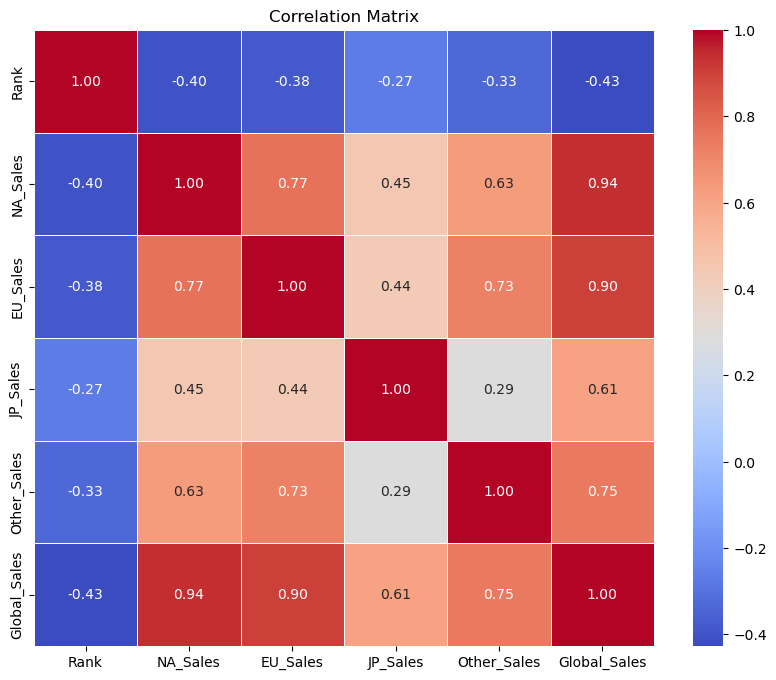

In [24]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()